# Application température :

---------------

Température seuil :  31.5 °C
Alarme activée
Connexion établie avec :  COM3
START ACQUIRING
Mail envoyé à la date du2023-07-04 19:37:44.248752
END ACQUIRING
Acquisition enregistrée dans Acquisition.txt
Acquisition enregistrée dans Acquisition.csv
Figure enregistrée dans Figure.png
Figure enregistrée dans Figure.jpg


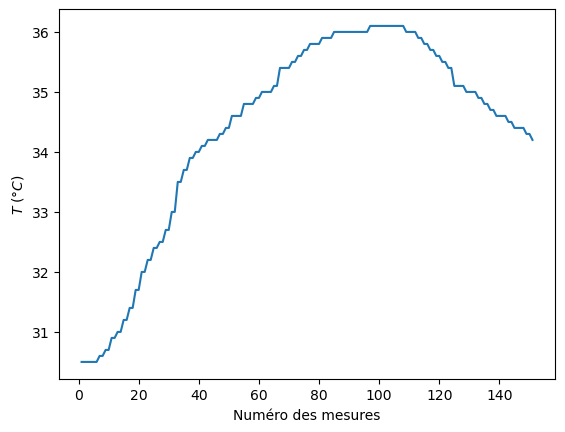

In [ ]:
import sys  
from PyQt5 import QtCore, QtGui, QtWidgets
from pyqtgraph import PlotWidget, plot
import pyqtgraph as pg
import os
import serial
import matplotlib.pyplot as plt
from time import sleep
import numpy as np
import time
from datetime import datetime

import serial
import serial.tools.list_ports

import smtplib, ssl

import pandas as pd



# Mail

message = """\
Subject: Alerte seuil depasse

Alerte Seuil de temperature depasse

This message is sent from Python."""

class Ui_Dialog(object):
    def setupUi(self, Dialog):
        Dialog.setObjectName("Dialog")
        Dialog.resize(265, 179)
        self.splitter = QtWidgets.QSplitter(Dialog)
        self.splitter.setGeometry(QtCore.QRect(20, 20, 223, 141))
        self.splitter.setOrientation(QtCore.Qt.Vertical)
        self.splitter.setObjectName("splitter")
        self.label_command = QtWidgets.QLabel(self.splitter)
        self.label_command.setObjectName("label_command")
        self.lineEdit_command = QtWidgets.QLineEdit(self.splitter)
        self.lineEdit_command.setObjectName("lineEdit_command")
        self.pushButton_validate_command = QtWidgets.QPushButton(self.splitter)
        self.pushButton_validate_command.setObjectName("pushButton_validate_command")
        self.pushButton_disable_commande = QtWidgets.QPushButton(self.splitter)
        self.pushButton_disable_commande.setObjectName("pushButton_disable_commande")

        self.retranslateUi(Dialog)
        QtCore.QMetaObject.connectSlotsByName(Dialog)

    def retranslateUi(self, Dialog):
        _translate = QtCore.QCoreApplication.translate
        Dialog.setWindowTitle(_translate("Dialog", "Dialog"))
        self.label_command.setText(_translate("Dialog", "<html><head/><body><p><span style=\" font-size:10pt;\">Commande pour faire une acquisition :</span></p></body></html>"))
        self.pushButton_validate_command.setText(_translate("Dialog", "Valider la commande"))
        self.pushButton_disable_commande.setText(_translate("Dialog", "Pas de Commande"))


        
class Ui_Help(object):
    def setupUi(self, Help):
        Help.setObjectName("Help")
        Help.resize(468, 485)
        self.label_guide = QtWidgets.QLabel(Help)
        self.label_guide.setGeometry(QtCore.QRect(20, 10, 431, 431))
        self.label_guide.setObjectName("label_guide")

        self.retranslateUi(Help)
        QtCore.QMetaObject.connectSlotsByName(Help)

    def retranslateUi(self, Help):
        _translate = QtCore.QCoreApplication.translate
        Help.setWindowTitle(_translate("Help", "Guide d\'utilisation"))
        self.label_guide.setText(_translate("Help", "<html><head/><body><p>En premier lieu, vous devez éditer la commande qui ordonne à votre appareil de faire</p><p>une acquisition en cliquant sur le bouton<span style=\" font-style:italic;\"> Edit Commands</span></p><p>(par défaut le programme considère qu\'il n\'y en a pas).</p><p><br/></p><p>Vous devez ensuite établir la connection série avec votre appareil en indiquant baudrate,</p><p>timeout et port virtuel.</p><p><br/></p><p>Vous pouvez changer la durée entre 2 mesures même pendant une acquisition.</p><p><br/></p><p>Si l\'acquisition ne se lance pas, re-appyuez sur le bouton ou relancez l\'application</p><p>(sans doute que le moment entre la déclaration de la commande et le</p><p>début de l\'acquisition est trop court). </p><p><br/></p><p>En activant l\'alarme, vous receverez un mail de vous même vous indiquant la date</p><p>à laquelle la température seuil a été franchie (attention au mot de passe indiqué).</p><p><br/></p></body></html>"))

        


class Ui_MainWindow(object):
    def setupUi(self, MainWindow):
        
         #----- Fenêtre HELP
        
        self.Help = QtWidgets.QDialog()
        self.ui_Help = Ui_Help()
        self.ui_Help.setupUi(self.Help)
        
        
        #----- Fenêtre pour changer les commandes
        
        self.Dialog =  QtWidgets.QDialog()
        self.ui_Dialog = Ui_Dialog()
        self.ui_Dialog.setupUi(self.Dialog)
        
        #-------- MainWindow
        
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(819, 651)
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        
        #----------------------------------------
        
        
        # -------- Status Bar
        
        self.statusbar = QtWidgets.QStatusBar(MainWindow)
        self.statusbar.setObjectName("statusbar")
        
        self.statusbar.showMessage("Bienvenue, veuillez sélectionner le port série relié au capteur de température")
        
        MainWindow.setStatusBar(self.statusbar)
        # Action initiale---
        #MainWindow.setStatusBar("Bienvenue, veuillez sélectionner le port série relié au capteur de température")
        
        
        
        #-------------------------------   Plot Widget + widget1 + Layout
        
        self.widget = PlotWidget(self.centralwidget)
        self.widget.setGeometry(QtCore.QRect(29, 299, 761, 301))
        self.widget.setObjectName("widget")
        self.widget.setBackground('w')            # Fond blanc
        self.widget1 = QtWidgets.QWidget(self.centralwidget)
        self.widget1.setGeometry(QtCore.QRect(30, 0, 762, 291))
        self.widget1.setObjectName("widget1")
        self.verticalLayout = QtWidgets.QVBoxLayout(self.widget1)
        self.verticalLayout.setContentsMargins(0, 0, 0, 0)
        self.verticalLayout.setObjectName("verticalLayout")
        self.horizontalLayout_7 = QtWidgets.QHBoxLayout()
        self.horizontalLayout_7.setObjectName("horizontalLayout_7")
        self.title = QtWidgets.QLabel(self.widget1)
        self.title.setObjectName("title")
        self.horizontalLayout_7.addWidget(self.title)
        self.pushButton_edit_Commands = QtWidgets.QPushButton(self.widget1)
        self.pushButton_edit_Commands.setObjectName("pushButton_edit_Commands")
        self.horizontalLayout_7.addWidget(self.pushButton_edit_Commands)
        self.verticalLayout.addLayout(self.horizontalLayout_7)
        self.line = QtWidgets.QFrame(self.widget1)
        self.line.setFrameShape(QtWidgets.QFrame.HLine)
        self.line.setFrameShadow(QtWidgets.QFrame.Sunken)
        self.line.setObjectName("line")
        self.verticalLayout.addWidget(self.line)
        self.horizontalLayout = QtWidgets.QHBoxLayout()
        self.horizontalLayout.setObjectName("horizontalLayout")
        
        #
        
        #-------    Selection du port série relié au capteur de température
        
        self.list_serial_ports = serial.tools.list_ports.comports()   # liste des ports série accessibles
        # Il faut que le capteur soit connecté avant le lancement de l'application
        
        self.list_COM = []  # contient les COMs relié aux appareils connectés
        self.list_ports_description = [] # // une description des appareils connectés
        
        
        self.label_select_serial_port = QtWidgets.QLabel(self.widget1)
        self.label_select_serial_port.setObjectName("label_select_serial_port")
        self.horizontalLayout.addWidget(self.label_select_serial_port)
        
        
        self.comboBox_select_serial_port = QtWidgets.QComboBox(self.widget1)
        self.comboBox_select_serial_port.setObjectName("comboBox_select_serial_port")
        self.comboBox_select_serial_port.addItem("")
        
        
        
        for port in self.list_serial_ports:
            self.list_COM.append(port.device)
            self.list_ports_description.append(f"{port}")
            self.comboBox_select_serial_port.addItem(f"{port}")
        
        
        self.horizontalLayout.addWidget(self.comboBox_select_serial_port)
        self.verticalLayout.addLayout(self.horizontalLayout)
        self.horizontalLayout_2 = QtWidgets.QHBoxLayout()
        self.horizontalLayout_2.setObjectName("horizontalLayout_2")
        self.label_baudrate = QtWidgets.QLabel(self.widget1)
        self.label_baudrate.setObjectName("label_baudrate")
        self.horizontalLayout_2.addWidget(self.label_baudrate)
        self.lineEdit_baudrate = QtWidgets.QLineEdit(self.widget1)
        self.lineEdit_baudrate.setObjectName("lineEdit_baudrate")
        self.horizontalLayout_2.addWidget(self.lineEdit_baudrate)
        self.label_timeout = QtWidgets.QLabel(self.widget1)
        self.label_timeout.setObjectName("label_timeout")
        self.horizontalLayout_2.addWidget(self.label_timeout)
        self.lineEdit_timeout = QtWidgets.QLineEdit(self.widget1)
        self.lineEdit_timeout.setObjectName("lineEdit_timeout")
        self.horizontalLayout_2.addWidget(self.lineEdit_timeout)
        self.pushButton_validate_device = QtWidgets.QPushButton(self.widget1)
        self.pushButton_validate_device.setObjectName("pushButton_validate_device")
        self.horizontalLayout_2.addWidget(self.pushButton_validate_device)
        self.verticalLayout.addLayout(self.horizontalLayout_2)
        self.line_2 = QtWidgets.QFrame(self.widget1)
        self.line_2.setFrameShape(QtWidgets.QFrame.HLine)
        self.line_2.setFrameShadow(QtWidgets.QFrame.Sunken)
        self.line_2.setObjectName("line_2")
        self.verticalLayout.addWidget(self.line_2)
        self.horizontalLayout_3 = QtWidgets.QHBoxLayout()
        self.horizontalLayout_3.setObjectName("horizontalLayout_3")
        self.button_new_acquiring = QtWidgets.QPushButton(self.widget1)
        self.button_new_acquiring.setObjectName("button_new_acquiring")
        self.horizontalLayout_3.addWidget(self.button_new_acquiring)
        self.checkBox_plot = QtWidgets.QCheckBox(self.widget1)
        self.checkBox_plot.setObjectName("checkBox_plot")
        self.checkBox_plot.setChecked(True)   # Affiche les mesures par défaut
        self.horizontalLayout_3.addWidget(self.checkBox_plot)
        self.button_stop_acquiring = QtWidgets.QPushButton(self.widget1)
        self.button_stop_acquiring.setObjectName("button_stop_acquiring")
        self.horizontalLayout_3.addWidget(self.button_stop_acquiring)
        self.verticalLayout.addLayout(self.horizontalLayout_3)
        self.line_3 = QtWidgets.QFrame(self.widget1)
        self.line_3.setFrameShape(QtWidgets.QFrame.HLine)
        self.line_3.setFrameShadow(QtWidgets.QFrame.Sunken)
        self.line_3.setObjectName("line_3")
        self.verticalLayout.addWidget(self.line_3)
        self.horizontalLayout_4 = QtWidgets.QHBoxLayout()
        self.horizontalLayout_4.setObjectName("horizontalLayout_4")
        self.label_duree = QtWidgets.QLabel(self.widget1)
        self.label_duree.setObjectName("label_duree")
        self.horizontalLayout_4.addWidget(self.label_duree)
        self.SpinBox_duree = QtWidgets.QDoubleSpinBox(self.widget1)
        self.SpinBox_duree.setObjectName("SpinBox_duree")
        self.horizontalLayout_4.addWidget(self.SpinBox_duree)
        self.comboBox_duree = QtWidgets.QComboBox(self.widget1)
        self.comboBox_duree.setObjectName("comboBox_duree")
        self.comboBox_duree.addItem("")
        self.comboBox_duree.addItem("")
        self.comboBox_duree.addItem("")
        self.comboBox_duree.addItem("")
        self.horizontalLayout_4.addWidget(self.comboBox_duree)
        self.pushButton_change_duree = QtWidgets.QPushButton(self.widget1)
        self.pushButton_change_duree.setObjectName("pushButton_change_duree")
        self.horizontalLayout_4.addWidget(self.pushButton_change_duree)
        self.verticalLayout.addLayout(self.horizontalLayout_4)
        self.line_4 = QtWidgets.QFrame(self.widget1)
        self.line_4.setFrameShape(QtWidgets.QFrame.HLine)
        self.line_4.setFrameShadow(QtWidgets.QFrame.Sunken)
        self.line_4.setObjectName("line_4")
        self.verticalLayout.addWidget(self.line_4)
        self.horizontalLayout_5 = QtWidgets.QHBoxLayout()
        self.horizontalLayout_5.setObjectName("horizontalLayout_5")
        self.label_temp_mesuree = QtWidgets.QLabel(self.widget1)
        self.label_temp_mesuree.setObjectName("label_temp_mesuree")
        self.horizontalLayout_5.addWidget(self.label_temp_mesuree)
        self.affiche_temp_mesuree = QtWidgets.QLineEdit(self.widget1)
        self.affiche_temp_mesuree.setReadOnly(True)
        self.affiche_temp_mesuree.setObjectName("affiche_temp_mesuree")
        self.horizontalLayout_5.addWidget(self.affiche_temp_mesuree)
        self.label_date_mesure = QtWidgets.QLabel(self.widget1)
        self.label_date_mesure.setObjectName("label_date_mesure")
        self.horizontalLayout_5.addWidget(self.label_date_mesure)
        self.affiche_date_mesure = QtWidgets.QLineEdit(self.widget1)
        self.affiche_date_mesure.setText("")
        self.affiche_date_mesure.setReadOnly(True)
        self.affiche_date_mesure.setObjectName("affiche_date_mesure")
        self.horizontalLayout_5.addWidget(self.affiche_date_mesure)
        self.verticalLayout.addLayout(self.horizontalLayout_5)
        self.line_5 = QtWidgets.QFrame(self.widget1)
        self.line_5.setFrameShape(QtWidgets.QFrame.HLine)
        self.line_5.setFrameShadow(QtWidgets.QFrame.Sunken)
        self.line_5.setObjectName("line_5")
        self.verticalLayout.addWidget(self.line_5)
        self.horizontalLayout_6 = QtWidgets.QHBoxLayout()
        self.horizontalLayout_6.setObjectName("horizontalLayout_6")
        self.label_seuil = QtWidgets.QLabel(self.widget1)
        self.label_seuil.setObjectName("label_seuil")
        self.horizontalLayout_6.addWidget(self.label_seuil)
        self.lineEdit_seuil = QtWidgets.QLineEdit(self.widget1)
        self.lineEdit_seuil.setObjectName("lineEdit_seuil")
        self.horizontalLayout_6.addWidget(self.lineEdit_seuil)
        self.label_mail = QtWidgets.QLabel(self.widget1)
        self.label_mail.setObjectName("label_mail")
        self.horizontalLayout_6.addWidget(self.label_mail)
        self.lineEdit_mail = QtWidgets.QLineEdit(self.widget1)
        self.lineEdit_mail.setObjectName("lineEdit_mail")
        self.horizontalLayout_6.addWidget(self.lineEdit_mail)
        self.label_password = QtWidgets.QLabel(self.widget1)
        self.label_password.setObjectName("label_password")
        self.horizontalLayout_6.addWidget(self.label_password)
        self.lineEdit_password = QtWidgets.QLineEdit(self.widget1)
        self.lineEdit_password.setObjectName("lineEdit_password")
        self.horizontalLayout_6.addWidget(self.lineEdit_password)
        self.checkBox_seuil = QtWidgets.QCheckBox(self.widget1)
        self.checkBox_seuil.setObjectName("checkBox_seuil")
        self.horizontalLayout_6.addWidget(self.checkBox_seuil)
        self.verticalLayout.addLayout(self.horizontalLayout_6)
        self.line_6 = QtWidgets.QFrame(self.widget1)
        self.line_6.setFrameShape(QtWidgets.QFrame.HLine)
        self.line_6.setFrameShadow(QtWidgets.QFrame.Sunken)
        self.line_6.setObjectName("line_6")
        self.verticalLayout.addWidget(self.line_6)
        MainWindow.setCentralWidget(self.centralwidget)
        self.menubar = QtWidgets.QMenuBar(MainWindow)
        self.menubar.setGeometry(QtCore.QRect(0, 0, 819, 21))
        self.menubar.setObjectName("menubar")
        self.menuEnregistrer_l_acquisition = QtWidgets.QMenu(self.menubar)
        self.menuEnregistrer_l_acquisition.setObjectName("menuEnregistrer_l_acquisition")
        self.menuEnregistrer_la_figure = QtWidgets.QMenu(self.menubar)
        self.menuEnregistrer_la_figure.setObjectName("menuEnregistrer_la_figure")
        self.menuHelp = QtWidgets.QMenu(self.menubar)
        self.menuHelp.setObjectName("menuHelp")
        MainWindow.setMenuBar(self.menubar)
        self.statusbar = QtWidgets.QStatusBar(MainWindow)
        self.statusbar.setObjectName("statusbar")
        MainWindow.setStatusBar(self.statusbar)
        self.actionen_txt = QtWidgets.QAction(MainWindow)
        self.actionen_txt.setObjectName("actionen_txt")
        self.actionen_csv = QtWidgets.QAction(MainWindow)
        self.actionen_csv.setObjectName("actionen_csv")
        self.actionen_png = QtWidgets.QAction(MainWindow)
        self.actionen_png.setObjectName("actionen_png")
        self.actionen_jpg = QtWidgets.QAction(MainWindow)
        self.actionen_jpg.setObjectName("actionen_jpg")
        self.actionGuide_d_utilisation = QtWidgets.QAction(MainWindow)
        self.actionGuide_d_utilisation.setObjectName("actionGuide_d_utilisation")
        self.menuEnregistrer_l_acquisition.addAction(self.actionen_txt)
        self.menuEnregistrer_l_acquisition.addAction(self.actionen_csv)
        self.menuEnregistrer_la_figure.addAction(self.actionen_png)
        self.menuEnregistrer_la_figure.addAction(self.actionen_jpg)
        self.menuHelp.addAction(self.actionGuide_d_utilisation)
        self.menubar.addAction(self.menuEnregistrer_l_acquisition.menuAction())
        self.menubar.addAction(self.menuEnregistrer_la_figure.menuAction())
        self.menubar.addAction(self.menuHelp.menuAction())

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)
        
        
         #--------------------- Plot-------------------------------
        
        self.dt = 5000 # 5 secondes : durée par défaut entre 2 mesures
        
        MainWindow.setStatusTip("Bienvenue, veuillez sélectionner l'appareil de mesure")
        
        #----------------------------------- Actions sur les boutons--------------
        
        # Valider le port série sélectionné
        self.pushButton_validate_device.clicked.connect(self.valid_port)
        
        self.enable_plot = True   #1 booleen qui indique si on affiche les mesures ou non qui est False par défaut
        
        self.checkBox_plot.stateChanged.connect(self.update_enable_plot)
        
        self.button_new_acquiring.clicked.connect(self.acquire)    # Lance une nouvelle acquisition
        self.acq_en_cours = 0 # Nous indique s'il y a une acquisition en cours
        
        self.button_stop_acquiring.clicked.connect(self.stop_acquire)   # arrête l'acquisition en cours
        
        
        self.pushButton_change_duree.clicked.connect(self.change_intervall)   # On valide le changement de durée
        
        self.pushButton_edit_Commands.clicked.connect(self.open_window_edit_commands)   # Ouvre la fenêtre pour éditer la commande
        
        
        #----------------------------------- Actions pour la fenêtre EDIT COMMANDS--------------
        
        self.command = False   # indique s'il y a une commande propre indiquée à l'appareil
        
        self.ui_Dialog.pushButton_validate_command.clicked.connect(self.set_command)
        
        self.ui_Dialog.pushButton_disable_commande.clicked.connect(self.disable_command)
        
        
        #---------------------------------------------------------------------------------------------------------------------
        
        #----------------------------------------- QActions
        
        self.actionen_csv.triggered.connect(self.save_acq_as_csv)
        self.actionen_txt.triggered.connect(self.save_acq_as_txt)
        
        self.actionen_png.triggered.connect(self.save_fig_as_png)
        self.actionen_jpg.triggered.connect(self.save_fig_as_jpg)
        
        self.actionGuide_d_utilisation.triggered.connect(self.show_help_window)
        
        #---------------------------------------------------------------------------------------------------------------------
        
        #---------------------- Alerte par mail
        
        self.alert_bool = True  # booléen qui est True si le seuil n'a pas été atteint, et False s'il a été atteint
        
        self.mail_valide = False # booléen qui indique si le mail et le mot de passe sont valides
        
        self.checkBox_seuil.clicked.connect(self.check_mail) # vérifie si le mail et le mot de passe entrés sont valides
        
        self.command_MEAS = None   # Si une commande est définie ou non
        
        #---------------------------------------------------------------------------------------------------------------------
        

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "MainWindow"))
        self.title.setText(_translate("MainWindow", "<html><head/><body><p><span style=\" font-size:14pt; font-weight:600; text-decoration: underline;\">Suivi en temps réel de la température :</span></p></body></html>"))
        self.pushButton_edit_Commands.setText(_translate("MainWindow", "Edit Commands"))
        self.label_select_serial_port.setText(_translate("MainWindow", "<html><head/><body><p><span style=\" font-size:12pt;\">Veuillez sélectionner le port série relié au capteur :</span></p></body></html>"))
        self.comboBox_select_serial_port.setItemText(0, _translate("MainWindow", "choisir un port série"))
        self.label_baudrate.setText(_translate("MainWindow", "<html><head/><body><p><span style=\" font-size:9pt;\">Veuillez entrer la valeur du baudrate :</span></p></body></html>"))
        self.label_timeout.setText(_translate("MainWindow", "<html><head/><body><p><span style=\" font-size:9pt;\">Veuillez entrer du timeout (en s) :</span></p></body></html>"))
        self.pushButton_validate_device.setText(_translate("MainWindow", "Valider"))
        self.button_new_acquiring.setText(_translate("MainWindow", "Lancer une nouvelle acquisition"))
        self.checkBox_plot.setText(_translate("MainWindow", "Plot"))
        self.button_stop_acquiring.setText(_translate("MainWindow", "Arrêter l\'acquisition en cours"))
        self.label_duree.setText(_translate("MainWindow", "Durée entre 2 mesures :"))
        self.comboBox_duree.setItemText(0, _translate("MainWindow", "unité"))
        self.comboBox_duree.setItemText(1, _translate("MainWindow", "secondes"))
        self.comboBox_duree.setItemText(2, _translate("MainWindow", "minutes"))
        self.comboBox_duree.setItemText(3, _translate("MainWindow", "heures"))
        self.pushButton_change_duree.setText(_translate("MainWindow", "Changer la durée"))
        self.label_temp_mesuree.setText(_translate("MainWindow", "Température mesurée :"))
        self.label_date_mesure.setText(_translate("MainWindow", "Date de la mesure :"))
        self.label_seuil.setText(_translate("MainWindow", "Température seuil (en °C) :"))
        self.label_mail.setText(_translate("MainWindow", "e-mail :"))
        self.label_password.setText(_translate("MainWindow", "password :"))
        self.checkBox_seuil.setText(_translate("MainWindow", "Prévenir par mail"))
        self.menuEnregistrer_l_acquisition.setTitle(_translate("MainWindow", "Enregistrer l\'acquisition"))
        self.menuEnregistrer_la_figure.setTitle(_translate("MainWindow", "Enregistrer la figure"))
        self.menuHelp.setTitle(_translate("MainWindow", "Help"))
        self.actionen_txt.setText(_translate("MainWindow", "en .txt"))
        self.actionen_csv.setText(_translate("MainWindow", "en .csv"))
        self.actionen_png.setText(_translate("MainWindow", "en .png"))
        self.actionen_jpg.setText(_translate("MainWindow", "en .jpg"))
        self.actionGuide_d_utilisation.setText(_translate("MainWindow", "Guide d\'utilisation"))
        
        
    def valid_port(self):      # On valide le choix du capteur utilisé
        selected_item = self.comboBox_select_serial_port.currentText() 
        index_selected_item = self.list_ports_description.index(selected_item)   # indice de l'appareil choisi
        self.com_selected_device = self.list_COM[index_selected_item]
        bd_rate = int(self.lineEdit_baudrate.text())
        time_out = int(self.lineEdit_timeout.text())
        
        try:
            self.capteur = serial.Serial(self.com_selected_device, bd_rate, timeout=time_out)
            MainWindow.statusBar()
            MainWindow.setStatusTip('Connexion établie avec : ' + self.com_selected_device)
            print('Connexion établie avec : ',self.com_selected_device)
            self.capteur.close()
        except:
            MainWindow.setStatusTip('Aucune connexion établie, vérifier les paramètres entrés')
            print('Aucune connexion établie, véfirier les paramètres entrés')
            
    def update_enable_plot(self):           # Mise à jour 
        self.enable_plot = self.checkBox_plot.isChecked()
        if self.enable_plot:
            self.widget.show()
            MainWindow.resize(819, 651)
        else:
            self.widget.hide()
            MainWindow.resize(819, 350)
        print(self.enable_plot)
        
        
        
    def update_plot_data(self):
        
        # EVENTUELLE COMMANDE POUR MESURER LA TEMPERATURE
        if self.command:
            self.capteur.write(self.command_MEAS)
            #self.capteur.write(b'TEMP?\r')
        #----------------
        
        temp_mesuree = float(self.capteur.readline().decode('ascii'))
        date_mesure = datetime.now()  # Date de la mesure
        
        self.affiche_date_mesure.setText(date_mesure.strftime('%Y-%m-%d')+'   '+date_mesure.strftime('%H')+'h:'+date_mesure.strftime('%M')+'min:'+date_mesure.strftime('%S')+'s')
        self.affiche_temp_mesuree.setText(str(temp_mesuree)+' °C')
        
        self.temperature.append( temp_mesuree) 
        
        self.numero_mesures.append( len(self.temperature) )
        self.dates_mesures.append(str(date_mesure))
        
        
        self.data_line.setData(self.numero_mesures, self.temperature)
        
        
        
        if self.checkBox_seuil.isChecked() and self.alert_bool and self.mail_valide:
            
            if temp_mesuree >= self.T_seuil:
                self.alert_bool = False
                if '@gmail' in self.e_mail:
                    port = 465  # For SSL
                    smtp_server = "smtp.gmail.com"
                    sender_email = self.e_mail  
                    receiver_email = self.e_mail  
                    password = self.password
                    
                    #message
        
                    context = ssl.create_default_context()
                    with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
                        server.login(sender_email, password)
                        server.sendmail(sender_email, receiver_email, message)
                        print("Mail envoyé à la date du" + str(date_mesure))
                        MainWindow.setStatusTip("Mail envoyé à la date du " + str(date_mesure))
                            
                elif '@yahoo' in self.e_mail:
                    port = 465  # For SSL
                    smtp_server = "smtp.mail.yahoo.com"
                    sender_email = self.e_mail  
                    receiver_email = self.e_mail  
                    password = self.password
                    #message

                    context = ssl.create_default_context()
                    with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
                        server.login(sender_email, password)
                        server.sendmail(sender_email, receiver_email, message)
                        print("Mail envoyé à la date du" + str(date_mesure))
                        MainWindow.setStatusTip("Mail envoyé à la date du " + str(date_mesure))
                            
    
                        
            #except:
                #print("Veuillez remplir les cases correspondantes avant d'activer l'alerte ou vérifier l'adresse mail indiquée")
                #MainWindow.setStatusTip("Veuillez remplir les cases correspondantes avant d'activer l'alerte ou vérifier l'adresse mail indiquée")

        
        
        
    def acquire(self):        # Lance une nouvelle acquisition
        
        self.acq_en_cours+= 1
        
        if self.acq_en_cours==1:
        
            print("START ACQUIRING")
            MainWindow.setStatusTip('Acquisition en cours...')
            MainWindow.setStatusTip('Connexion établie avec : ' + self.com_selected_device + ', acquisition en cours...')
            # user friendly

            self.capteur.open()

            #### EVENTUELLE COMMANDE POUR LANCER UNE ACQUISITION OU UNE MESURE-----------------
            if self.command:
                self.capteur.write(self.command_MEAS)
                #self.capteur.write(b'TEMP?\r')
            sleep(1)

            date_mesure = datetime.now()
            data_temp = float(self.capteur.readline().decode('ascii'))  # température mesurée
            
            
            
            #-------------------------- Alarme--------------------------
            if self.checkBox_seuil.isChecked() and self.alert_bool and self.mail_valide:
                if data_temp >= self.T_seuil:
                    self.alert_bool = False
                    if '@gmail' in self.e_mail:
                        port = 465  # For SSL
                        smtp_server = "smtp.gmail.com"
                        sender_email = self.e_mail  
                        receiver_email = self.e_mail  
                        password = self.password
                        #message

                        context = ssl.create_default_context()
                        with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
                            server.login(sender_email, password)
                            server.sendmail(sender_email, receiver_email, message)
                            print("Mail envoyé à la date du" + str(date_mesure))
                            MainWindow.setStatusTip("Mail envoyé à la date du " + str(date_mesure))

                    elif '@yahoo' in self.e_mail:
                        port = 465  # For SSL
                        smtp_server = "smtp.mail.yahoo.com"
                        sender_email = self.e_mail  
                        receiver_email = self.e_mail  
                        password = self.password
                        #message

                        context = ssl.create_default_context()
                        with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
                            server.login(sender_email, password)
                            server.sendmail(sender_email, receiver_email, message)
                            print("Mail envoyé à la date du" + str(date_mesure))
                            MainWindow.setStatusTip("Mail envoyé à la date du " + str(date_mesure))
                            
                else:
                    self.alert_bool = True   # alarme est récativée si on repasse de nouveau par la seuil
            #------------------------------------------------------------------------------

            # mise-à-jour des labels
            self.affiche_date_mesure.setText(date_mesure.strftime('%Y-%m-%d')+'   '+date_mesure.strftime('%H')+'h:'+date_mesure.strftime('%M')+'min:'+date_mesure.strftime('%S')+'s')
            self.affiche_temp_mesuree.setText(str(data_temp)+' °C')

            self.temperature = [data_temp]
            self.numero_mesures = [1]
            self.dates_mesures = [str(date_mesure)]  # liste stockant les dates des mesures

            self.pen = pg.mkPen(color=(255, 0, 0))

            self.widget.clear()

            self.data_line =  self.widget.plot(self.numero_mesures, self.temperature, pen=self.pen)

            self.timer = QtCore.QTimer()
            self.timer.setInterval( self.dt )
            #print(self.dt)
            self.timer.timeout.connect(self.update_plot_data)
            self.timer.start()
            
        else:
            print('Il y a déja une acquisition en cours')
            MainWindow.setStatusTip('Il y a déja une acquisition en cours')
            self.acq_en_cours = 0
        
    def stop_acquire(self):
        
        
        
        if self.acq_en_cours==1:
            try:
                self.timer.stop()
            except:
                pass
            print("END ACQUIRING")
            MainWindow.setStatusTip('Connexion établie avec : ' + self.com_selected_device + ', acquisition stopée!')
            # user friendly
            
            #self.timer.stop()
            
            self.capteur.close()
            self.acq_en_cours = 0
            self.alert_bool = True
        else:
            print("Il n'y a pas d'acquisition en cours")
            MainWindow.setStatusTip("Il n'y a pas d'acquisition en cours")
            self.acq_en_cours = 0
            self.alert_bool = True
            
            
    def change_intervall(self):
        
        dt_read = float(self.SpinBox_duree.value())   # durée entre 2 mesures
        
        unite = self.comboBox_duree.currentText() 
        if unite == 'secondes':
            coef_unite = 1.0 * (10**3)
        elif unite == 'minutes':
            coef_unite = 60.0 * (10**3)
        elif unite =='heures':
            coef_unite = 3600.0 * (10**3)
        else:
            coef_unite = False
            
        if type(coef_unite)==float:
          
            self.dt = int(dt_read * coef_unite)   # mise à jour de la durée entre 2 mesures (pour l'affichage)
            print(self.dt)
            try:
                self.timer.setInterval( self.dt )
            except:
                pass
            print('Intervalle de temps mis-à-jour')
            print('Durée entre 2 mesures mise-à-jour à : ',self.dt*(10**(-3)),' s')
            MainWindow.setStatusTip('Intervalle de temps mis-à-jour')
            
        else:
            print('Pas de changement, vérifier les paramètres')
            MainWindow.setStatusTip('Pas de changement, vérifier les paramètres')
            
            
    def open_window_edit_commands(self):
        self.Dialog.show()
        
    def set_command(self):
        try:
        
            command = self.ui_Dialog.lineEdit_command.text()


            try:
                self.capteur.open()
                try:
                    command_test = command + '\n'
                    command_test = bytes(command_test, encoding='utf-8')
                    self.capteur.write(command_test)
                    sleep(1)
                    T_test = float(self.capteur.readline().decode('ascii'))
                    self.command = True
                    self.command_MEAS = command_test
                    print('Commande : ',self.command_MEAS)
                    MainWindow.setStatusTip(self.command_MEAS)
                except:
                    pass
                try:
                    command_test = command + ' \n'
                    command_test = bytes(command_test, encoding='utf-8')
                    self.capteur.write(command_test)
                    sleep(1)
                    T_test = float(self.capteur.readline().decode('ascii'))
                    self.command = True
                    self.command_MEAS = command_test
                    print('Commande : ',self.command_MEAS)
                    MainWindow.setStatusTip(self.command_MEAS)
                except:
                    pass

                try:
                    command_test = command + '\r'
                    command_test = bytes(command_test, encoding='utf-8')
                    self.capteur.write(command_test)
                    sleep(1)
                    T_test = float(self.capteur.readline().decode('ascii'))
                    self.command = True
                    self.command_MEAS = command_test
                    print('Commande : ',self.command_MEAS)
                    MainWindow.setStatusTip(self.command_MEAS)
                except:
                    pass
                try:
                    command_test = command + ' \r'
                    command_test = bytes(command_test, encoding='utf-8')
                    self.capteur.write(command_test)
                    sleep(1)
                    T_test = float(self.capteur.readline().decode('ascii'))
                    self.command = True
                    self.command_MEAS = command_test
                    print('Commande : ',self.command_MEAS)
                    MainWindow.setStatusTip(self.command_MEAS)
                except:
                    pass
                try:
                    command_test = command + '\r\n'
                    command_test = bytes(command_test, encoding='utf-8')
                    self.capteur.write(command_test)
                    sleep(1)
                    T_test = float(self.capteur.readline().decode('ascii'))
                    self.command = True
                    self.command_MEAS = command_test
                    print('Commande : ',self.command_MEAS)
                    MainWindow.setStatusTip(self.command_MEAS)
                except:
                    pass
                try:
                    command_test = command + ' \r\n'
                    command_test = bytes(command_test, encoding='utf-8')
                    self.capteur.write(command_test)
                    sleep(1)
                    T_test = float(self.capteur.readline().decode('ascii'))
                    self.command = True
                    self.command_MEAS = command_test
                    print('Commande : ',self.command_MEAS)
                    MainWindow.setStatusTip(self.command_MEAS)
                except:
                    pass
                if self.command_MEAS==None:
                    print(self.command_MEAS)
                    print("Commande non reconnue")
                    MainWindow.setStatusTip("Commande non reconnue")
                    
                self.capteur.close()
            except:
                print("Pas d'appareil connecté")
                MainWindow.setStatusTip("Pas d'appareil connecté")
        except:
            print("Pas de commande saisie")
            MainWindow.setStatusTip("Pas de commande saisie")
            
    def  disable_command(self):
        
        self.command = False
        self.ui_Dialog.lineEdit_command.setText('')
        print("Pas de commande")
        MainWindow.setStatusTip("Pas de commande")
        
    def save_acq_as_txt(self):
        
        np.savetxt('Acquisition.txt',self.temperature, delimiter=',', fmt='%f')
        print("Acquisition enregistrée dans Acquisition.txt")
        MainWindow.setStatusTip("Acquisition enregistrée dans Acquisition.txt")
        
        
        
    def save_acq_as_csv(self):
        
        dict_data = {"Date de la mesure (YY-MM-DD h:mn:s)":self.dates_mesures, "Température (°C)":self.temperature}
        data_frame = pd.DataFrame(data=dict_data)
        data_frame.to_csv("Acquisition.csv")
        print("Acquisition enregistrée dans Acquisition.csv")
        MainWindow.setStatusTip("Acquisition enregistrée dans Acquisition.csv")
        
    def save_fig_as_png(self):
        figure = plt.figure()
        plt.plot(self.numero_mesures, self.temperature)
        plt.ylabel(r'$T \;(°C)$')
        plt.xlabel('Numéro des mesures')
        plt.savefig("Figure.png")
        
        print("Figure enregistrée dans Figure.png")
        MainWindow.setStatusTip("Figure enregistrée dans Figure.png")
        
    def save_fig_as_jpg(self):
        figure = plt.figure()
        plt.plot(self.numero_mesures, self.temperature)
        plt.ylabel(r'$T \;(°C)$')
        plt.xlabel('Numéro des mesures')
        plt.savefig("Figure.png")
        plt.savefig("Figure.jpg")
        
        print("Figure enregistrée dans Figure.jpg")
        MainWindow.setStatusTip("Figure enregistrée dans Figure.jpg")
        
        
    def show_help_window(self):
        self.Help.show()
        
    def check_mail(self):
        if self.checkBox_seuil.isChecked():
            try:
                self.T_seuil = float( self.lineEdit_seuil.text() )
                self.e_mail = self.lineEdit_mail.text()
                self.password = self.lineEdit_password.text()
                print('Température seuil : ', self.T_seuil,'°C')
                if '@gmail' in self.e_mail:
                    smtp_address = 'smtp.gmail.com'
                    smtp_port = 465
                    email_address = self.e_mail
                    email_password = self.password
                    email_receiver = self.e_mail
                    context = ssl.create_default_context()
                    with smtplib.SMTP_SSL(smtp_address, smtp_port, context=context) as server:
                        server.login(email_address, email_password)
                        self.mail_valide = True
                        print("Alarme activée")
                        MainWindow.setStatusTip("Alarme activée")
                elif '@yahoo' in self.e_mail:
                    smtp_address = "smtp.mail.yahoo.com"
                    smtp_port = 465
                    email_address = self.e_mail
                    email_password = self.password
                    email_receiver = self.e_mail
                    context = ssl.create_default_context()
                    with smtplib.SMTP_SSL(smtp_address, smtp_port, context=context) as server:
                        server.login(email_address, email_password)
                        self.mail_valide = True 
                        print("Alarme activée")
                        MainWindow.setStatusTip("Alarme activée")
                        
                else:
                    print("Adresse gmail ou yahoo et/ou mot de passe invalides")
                    MainWindow.setStatusTip("Adresse gmail ou yahoo et/ou mot de passe invalides")
                    self.mail_valide = False
                        
                
            except:
                self.mail_valide = False
                print("Veuillez remplir les cases correspondantes avant d'activer l'alerte ou vérifier l'adresse mail indiquée")
                MainWindow.setStatusTip("Veuillez remplir les cases correspondantes avant d'activer l'alerte ou vérifier l'adresse mail indiquée")
        

        
        
        

if __name__ == "__main__":
    import sys
    app = QtWidgets.QApplication(sys.argv)
    MainWindow = QtWidgets.QMainWindow()
    ui = Ui_MainWindow()
    ui.setupUi(MainWindow)
    MainWindow.show()
    app.exec_()